<a href="https://colab.research.google.com/github/Sornambal/SkillCraft-Technology-Intern_Task_3/blob/main/Task_DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving bank-additional (1).zip to bank-additional (1).zip


In [2]:
import zipfile
import pandas as pd

with zipfile.ZipFile("bank-additional (1).zip", 'r') as zip_ref:
    zip_ref.extractall(".")

df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')
print("✅ Dataset Loaded Successfully")

✅ Dataset Loaded Successfully


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


In [6]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print("✅ Model Trained")

✅ Model Trained


In [9]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Accuracy: 0.8868657441126487

📉 Confusion Matrix:
 [[6817  486]
 [ 446  489]]

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



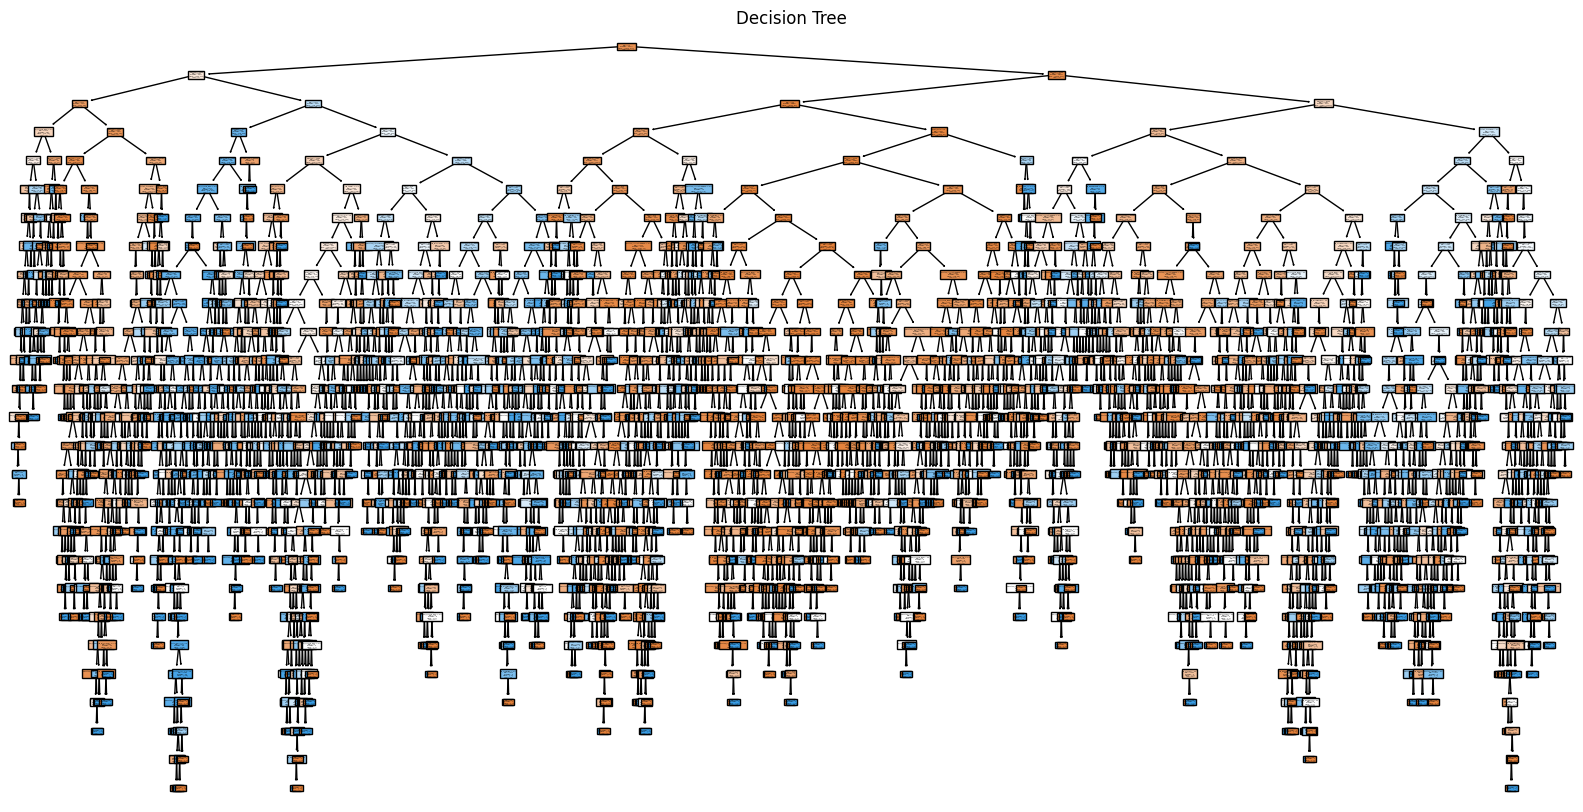

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree")
plt.show()